In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')


In [72]:
train=pd.read_csv('Titanic_train.csv')
test=pd.read_csv('Titanic_test.csv')

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [79]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [80]:
test.isnull().sum()


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [81]:
train['Age'].fillna(train['Age'].median(), inplace=True)


In [82]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [83]:
# Create a new column Deck from Cabin
train['Deck'] = train['Cabin'].astype(str).str[0]

# Replace 'n' (from NaN converted to string) with 'U' for Unknown
train['Deck'].replace('n', 'U', inplace=True)

# Dropping original Cabin column
train.drop('Cabin', axis=1, inplace=True)


In [84]:
# handling null values in Embarked colun with mode()
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [85]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [86]:
test.isnull().sum()


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [87]:
# Test data Null vale Handling

In [88]:
# handling null values in Age coumn with median
test['Age'].fillna(test['Age'].median(), inplace=True)

In [89]:
# similarly Fare with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [90]:
test['Deck'] = test['Cabin'].astype(str).str[0]
test['Deck'].replace('n', 'U', inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [91]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,U
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,U
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,U
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,U
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,U
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,U
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,U
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,U


In [92]:
# Drop unnecessary columns for logistic regression
train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [93]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,U
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,U
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,U
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,28.0,1,2,23.4500,S,U
889,1,1,male,26.0,0,0,30.0000,C,C


In [94]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,male,34.5,0,0,7.8292,Q,U
1,893,3,female,47.0,1,0,7.0000,S,U
2,894,2,male,62.0,0,0,9.6875,Q,U
3,895,3,male,27.0,0,0,8.6625,S,U
4,896,3,female,22.0,1,1,12.2875,S,U
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S,U
414,1306,1,female,39.0,0,0,108.9000,C,C
415,1307,3,male,38.5,0,0,7.2500,S,U
416,1308,3,male,27.0,0,0,8.0500,S,U


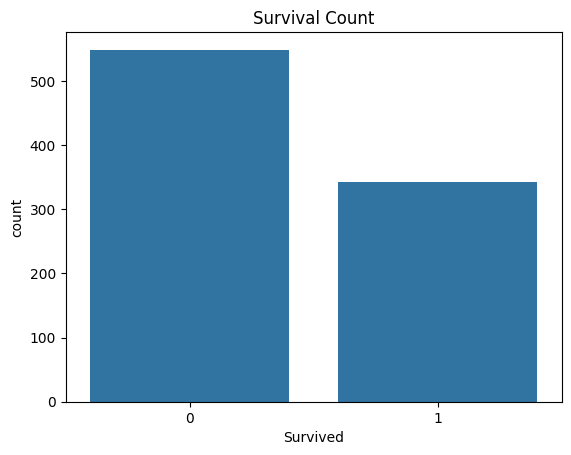

In [95]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()


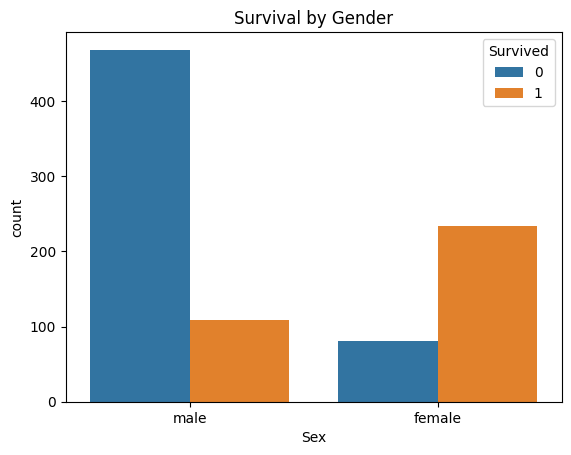

In [96]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()


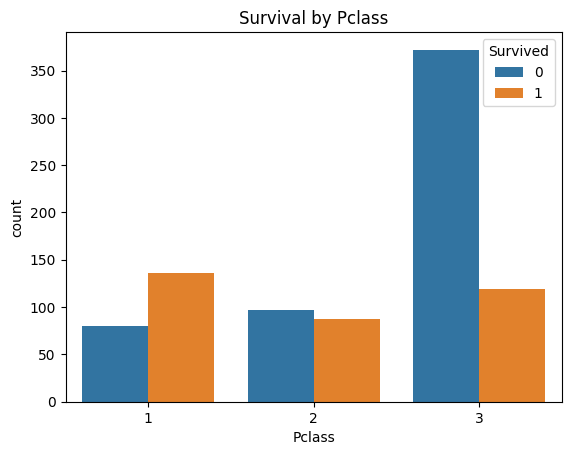

In [97]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Pclass')
plt.show()


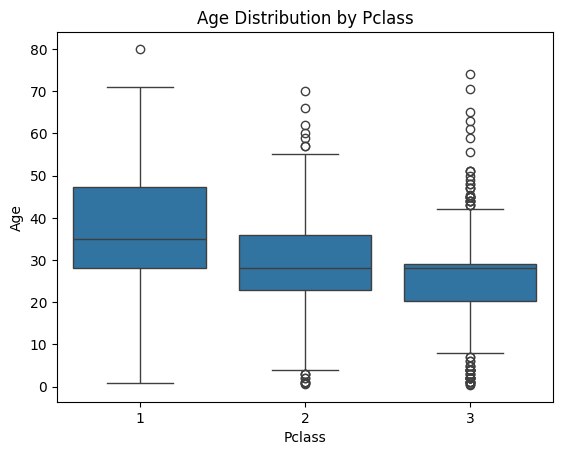

In [98]:
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Age Distribution by Pclass')
plt.show()


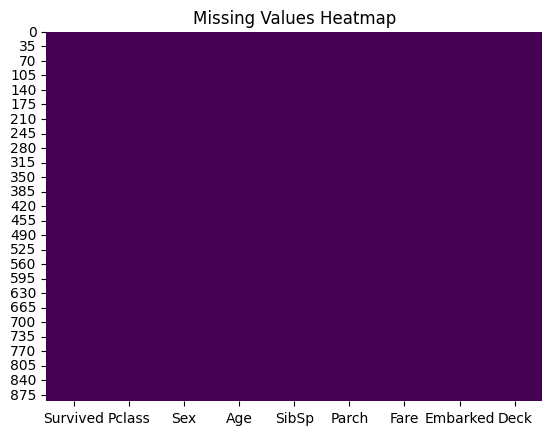

In [99]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


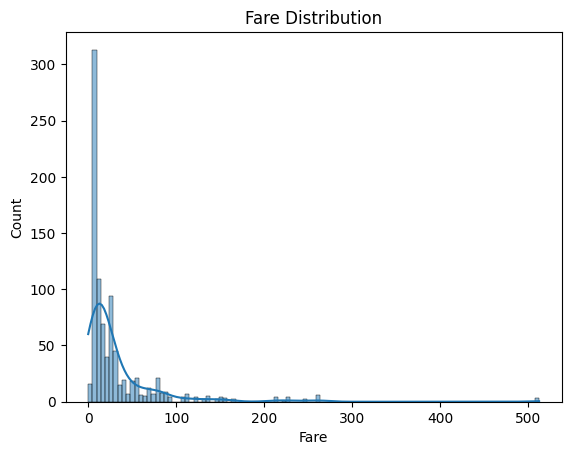

In [100]:
sns.histplot(train['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


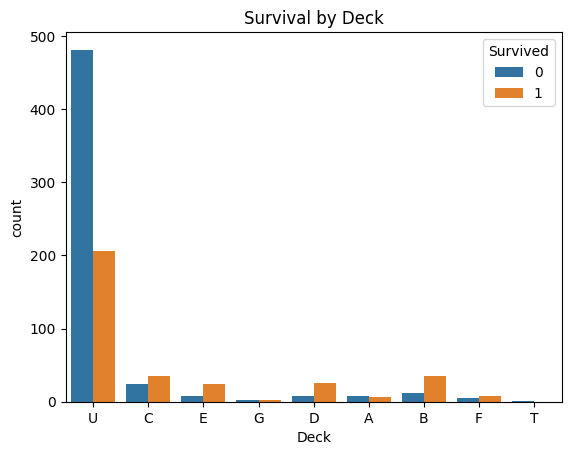

In [101]:
sns.countplot(x='Deck', hue='Survived', data=train)
plt.title('Survival by Deck')
plt.show()


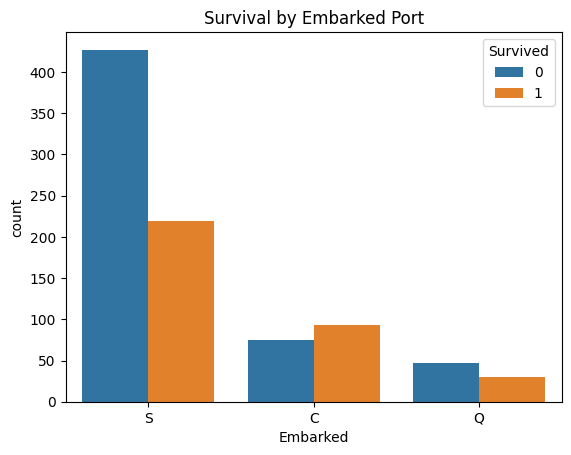

In [102]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival by Embarked Port')
plt.show()


In [103]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,U
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,U
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,U
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,28.0,1,2,23.4500,S,U
889,1,1,male,26.0,0,0,30.0000,C,C


In [104]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,male,34.5,0,0,7.8292,Q,U
1,893,3,female,47.0,1,0,7.0000,S,U
2,894,2,male,62.0,0,0,9.6875,Q,U
3,895,3,male,27.0,0,0,8.6625,S,U
4,896,3,female,22.0,1,1,12.2875,S,U
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S,U
414,1306,1,female,39.0,0,0,108.9000,C,C
415,1307,3,male,38.5,0,0,7.2500,S,U
416,1308,3,male,27.0,0,0,8.0500,S,U


In [105]:
# Manual Encoding

# Sex: male = 0, female = 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Embarked: S = 0, C = 1, Q = 2
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Deck: U = 0, C = 1, B = 2
train['Deck'] = train['Deck'].map({'U': 0, 'C': 1, 'B': 2})
test['Deck'] = test['Deck'].map({'U': 0, 'C': 1, 'B': 2})


In [106]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,22.0,1,0,7.2500,0,0.0
1,1,1,1,38.0,1,0,71.2833,1,1.0
2,1,3,1,26.0,0,0,7.9250,0,0.0
3,1,1,1,35.0,1,0,53.1000,0,1.0
4,0,3,0,35.0,0,0,8.0500,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0.0
887,1,1,1,19.0,0,0,30.0000,0,2.0
888,0,3,1,28.0,1,2,23.4500,0,0.0
889,1,1,0,26.0,0,0,30.0000,1,1.0


In [107]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,0,34.5,0,0,7.8292,2,0.0
1,893,3,1,47.0,1,0,7.0000,0,0.0
2,894,2,0,62.0,0,0,9.6875,2,0.0
3,895,3,0,27.0,0,0,8.6625,0,0.0
4,896,3,1,22.0,1,1,12.2875,0,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,0,0.0
414,1306,1,1,39.0,0,0,108.9000,1,1.0
415,1307,3,0,38.5,0,0,7.2500,0,0.0
416,1308,3,0,27.0,0,0,8.0500,0,0.0


In [108]:
# Splitting train data for model fitting
X_train = train.drop('Survived', axis=1)  # All columns except 'Survived'
y_train = train['Survived']               # Only the 'Survived' column


In [109]:
# Prepare test data (drop PassengerId only)
X_test = test.drop('PassengerId', axis=1)  # Removing PassengerId before prediction


In [110]:
X_test = test.drop('PassengerId', axis=1)


In [111]:
X_train['Deck'].isnull().sum()


np.int64(98)

In [112]:
X_train['Deck'] = X_train['Deck'].fillna(0)
X_test['Deck'] = X_test['Deck'].fillna(0)


In [113]:
X_train.isnull().sum()


,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Deck,0


In [114]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,0,22.0,1,0,7.2500,0,0.0
1,1,1,38.0,1,0,71.2833,1,1.0
2,3,1,26.0,0,0,7.9250,0,0.0
3,1,1,35.0,1,0,53.1000,0,1.0
4,3,0,35.0,0,0,8.0500,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0.0
887,1,1,19.0,0,0,30.0000,0,2.0
888,3,1,28.0,1,2,23.4500,0,0.0
889,1,0,26.0,0,0,30.0000,1,1.0


In [115]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [116]:
# Predict survival outcomes
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]

In [117]:
# Show all predicted values
y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [118]:
# predicted percentage values of each survived or not column
y_proba

array([0.12349052, 0.34202005, 0.12061959, 0.10265372, 0.58428061,
       0.16074526, 0.70044558, 0.20631072, 0.74440761, 0.07358843,
       0.10245292, 0.3186217 , 0.92328488, 0.05680012, 0.83332885,
       0.83506827, 0.28661026, 0.15689735, 0.53463637, 0.5004745 ,
       0.25158   , 0.18531687, 0.93332364, 0.63962425, 0.9038352 ,
       0.03281662, 0.95424978, 0.14921389, 0.36593453, 0.07423038,
       0.09145866, 0.1714044 , 0.48020797, 0.54143073, 0.45712933,
       0.17041628, 0.6135123 , 0.66840399, 0.11040084, 0.11588734,
       0.08442449, 0.49809264, 0.06158922, 0.80414343, 0.8407633 ,
       0.10996144, 0.38781159, 0.15928023, 0.8475036 , 0.52794537,
       0.45464703, 0.30119062, 0.76525274, 0.90085715, 0.30151767,
       0.09698154, 0.07681438, 0.10988487, 0.07799592, 0.95534421,
       0.14491644, 0.21464508, 0.14003747, 0.76239759, 0.66315259,
       0.82545123, 0.78991222, 0.32017508, 0.50710526, 0.82795345,
       0.74779687, 0.12640454, 0.59452427, 0.54734796, 0.95359

In [119]:
from sklearn.metrics import accuracy_score

# Predicting on training data itself
y_train_pred = model.predict(X_train)

# Calculating accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7957351290684624


In [120]:
# Converting predictions to a DataFrame
pd.DataFrame(y_pred, columns=['Survived'])

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [121]:
test_raw = pd.read_csv('Titanic_test.csv')
submission = pd.DataFrame({
    'PassengerId': test_raw['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)



In [122]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]



In [123]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_proba)


In [124]:
accuracy, precision, recall, f1, roc_auc

(0.7957351290684624,
 0.7484472049689441,
 0.7046783625730995,
 0.7259036144578314,
 np.float64(0.8554761980847687))

In [125]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)


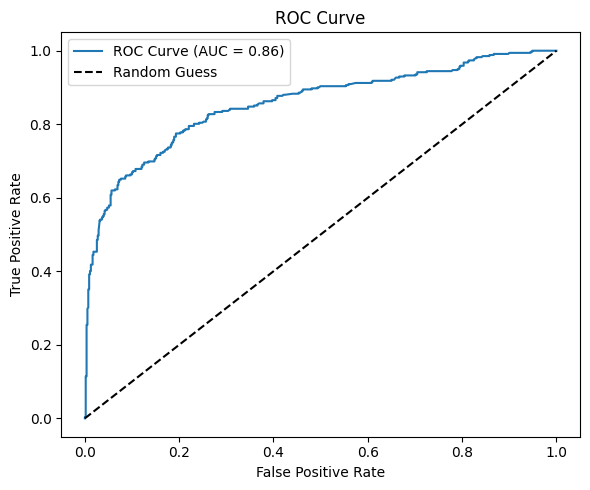

In [126]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.tight_layout()
plt.show()


In [127]:
# Extracting model coefficients and converting to odds ratios to understand feature impact on survival probability.
# Odds ratio > 1 increases survival chance, < 1 decreases it — useful for interpreting model logic.
coefficients = model.coef_[0]
intercept = model.intercept_[0]

In [128]:
odds_ratios = np.exp(coefficients)

In [129]:
# Creating a table to display each feature’s coefficient and its impact on survival odds.
feature_names = X_train.columns
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios
})

In [130]:
coef_table_sorted = coef_table.sort_values(by='Odds_Ratio', ascending=False)

In [131]:
coef_table_sorted

,Feature,Coefficient,Odds_Ratio
1,Sex,2.631924,13.900485
6,Embarked,0.253542,1.288581
5,Fare,0.002846,1.002850
4,Parch,-0.008421,0.991614
2,Age,-0.039522,0.961249
7,Deck,-0.065057,0.937014
3,SibSp,-0.322977,0.723991
0,Pclass,-1.054775,0.348271


In [132]:
import pickle

# Save the model
pickle.dump(model, open('logistic_model.pkl', 'wb'))
